In [41]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import scipy.integrate as integrate
import pandas as pd
import scipy.constants as sc
import transmon as pt
from tqdm import tqdm
import scipy.signal as ss
from matplotlib.pyplot import cm

# Initialise the parameters

In [45]:
Ec= 0.25
Ej= Ec * 70
N = 10
P0= 0.99
R0=  100 * np.pi
T1= 100
T2= 350
Tmax= 300
Points = 10000
t = np.linspace(0, Tmax, Points)
ng_vec = np.linspace(-1, 1, 10)

# Looping through ng

1000it [2:33:12,  9.19s/it]


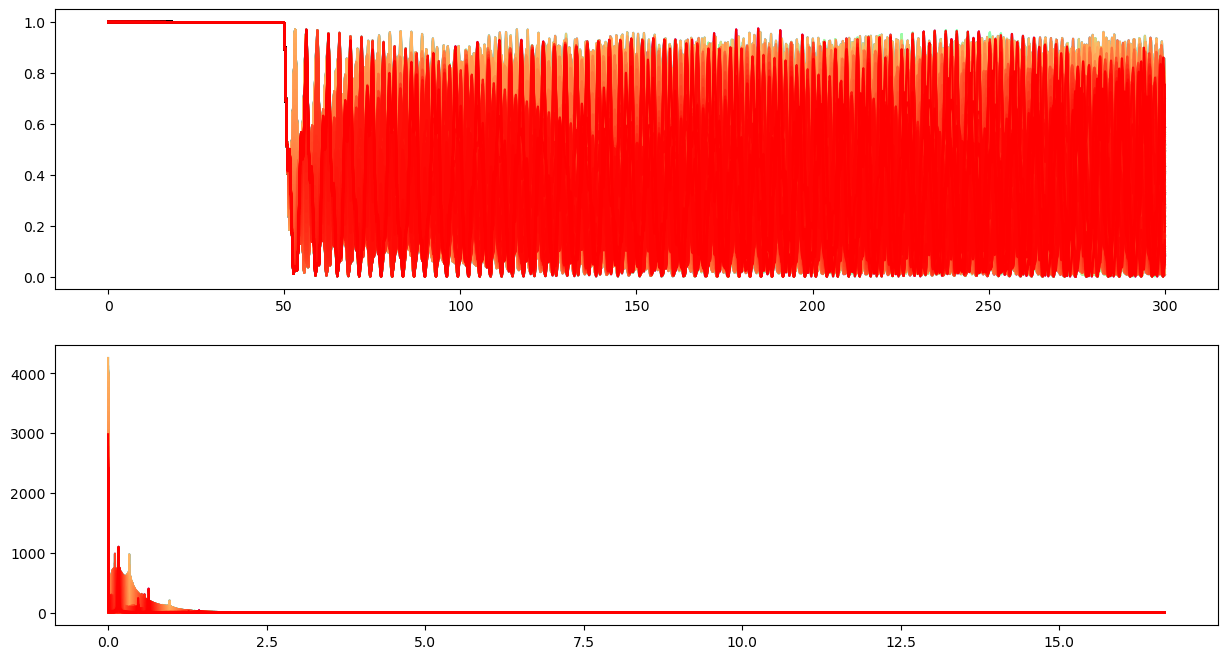

In [43]:
peak_frequency_vec = []
fig, ax = plt.subplots( nrows=2, ncols= 1,figsize=(15, 8))
colors = cm.rainbow(np.linspace(0, 1, len(ng_vec)))

for i, ng in tqdm(enumerate(ng_vec)):
    Ovrlps0 = pt.calculate_overlap(t, N, Ec, Ej, ng, T1, T2, Tmax, P0, R0, Points, states = [-1, 0], initial_state=0)
    sp = np.fft.rfft(Ovrlps0[0][t > T1*0.7])
    freq = np.fft.rfftfreq(len(t[t > T1*0.7]), t[1] - t[0])
    freq_peak= ss.find_peaks(np.abs(sp))[0]
    peak_frequency = freq[freq_peak[np.argmax(np.abs(sp[freq_peak]))]]
    peak_frequency_vec.append(peak_frequency)

    ax[0].plot(t, Ovrlps0[0], color = colors[i])
    ax[1].plot(freq, np.abs(sp), color = colors[i])

plt.show()

Plot the looping

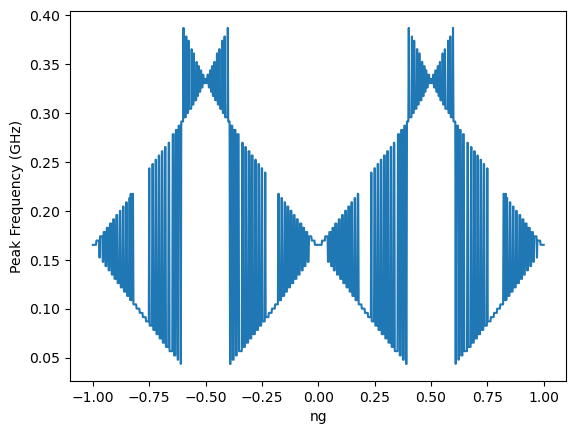

In [44]:
plt.plot(ng_vec, peak_frequency_vec)
plt.xlabel("ng")
plt.ylabel("Peak Frequency (GHz)")
plt.show()